<a href="https://colab.research.google.com/github/octet07/task6/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('/content/drive/MyDrive/AIML/Iris (1).csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


 1.Choose a classification dataset and normalize features

In [14]:
from sklearn.preprocessing import StandardScaler
# Separate features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
print(X_normalized_df.head())

         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0 -1.720542      -0.900681      1.032057      -1.341272     -1.312977
1 -1.697448      -1.143017     -0.124958      -1.341272     -1.312977
2 -1.674353      -1.385353      0.337848      -1.398138     -1.312977
3 -1.651258      -1.506521      0.106445      -1.284407     -1.312977
4 -1.628164      -1.021849      1.263460      -1.341272     -1.312977


 2.Use KNeighborsClassifier from sklearn

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Initialize and train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("KNN Accuracy:", accuracy)


KNN Accuracy: 1.0


 3.Experiment with different values of K.

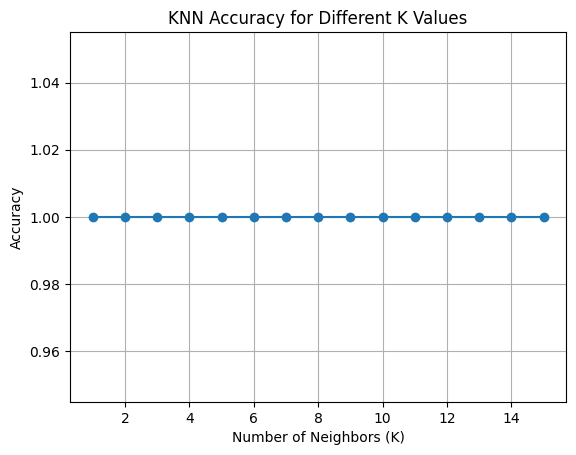

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Try K values from 1 to 15
k_values = list(range(1, 16))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs K
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.grid(True)
plt.show()


 4.Evaluate model using accuracy, confusion matrix.

Accuracy: 1.0


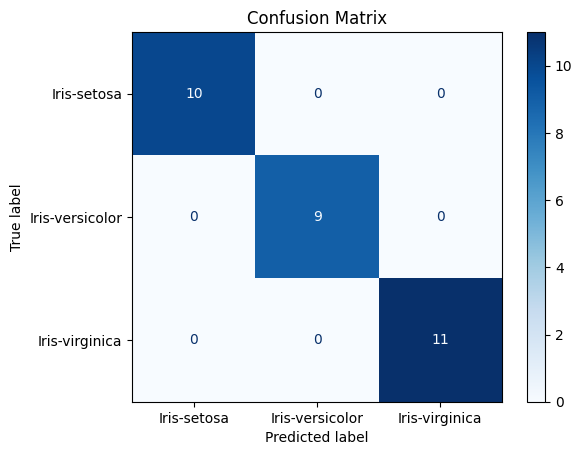

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Best model (you can replace 5 with optimal K if known)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


5.Visualize decision boundaries.

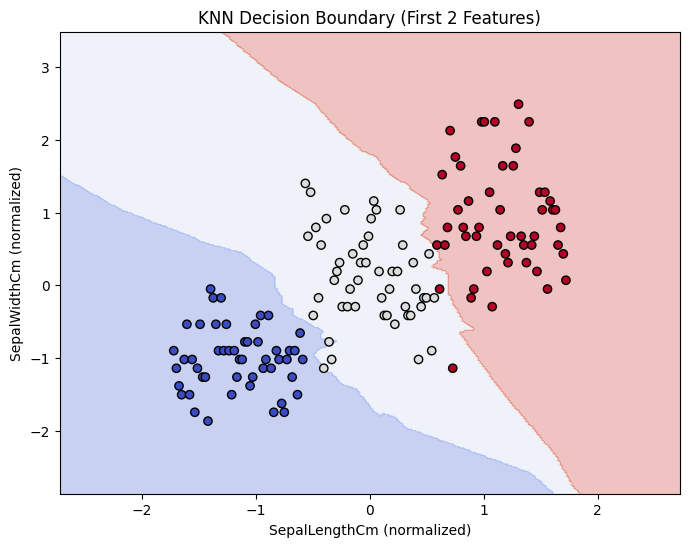

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Use only first 2 normalized features for 2D visualization
X_vis = X_normalized[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Convert target variable to numerical labels
le = LabelEncoder()
y_train_vis_encoded = le.fit_transform(y_train_vis)
y_test_vis_encoded = le.transform(y_test_vis)
y_encoded = le.transform(y)

# Fit model
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis_encoded)

# Create meshgrid
h = .02  # step size in the mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over meshgrid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_encoded, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('SepalLengthCm (normalized)')
plt.ylabel('SepalWidthCm (normalized)')
plt.title('KNN Decision Boundary (First 2 Features)')
plt.show()